**Project on conducting analyis on tweets extracted from twitter on the Supermarket Gaint - Coles during the peak period of COVID-19 Cases in Australia (March -2020).**

In [2]:
#Installing **twint** (An advanced twittwer scraping package)
!pip3 install twint

In [3]:
#Config to resolve issues with Twint
# To resolve twint data scraping issue
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/twint
Processing /content/twint
  Created wheel for twint: filename=twint-2.1.21-cp37-none-any.whl size=38863 sha256=a1f4a928680d0447d523bf1db99c6dc307e95a51f070420a4acf7a7fca480449
  Stored in directory: /tmp/pip-ephem-wheel-cache-0wyem6lc/wheels/c9/bb/bd/2b559954ecc4f4905266df71e9f2e08268750df0fa1ec1a4d2
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [4]:
# To patch asyncio to allow nested use of **asyncio.run** and **loop.run_until_complete**
# Modeule to patch asyncio to allow nested use of asyncio.run
import nest_asyncio
nest_asyncio.apply()

In [5]:
#import Twint
import twint

In [6]:
# Configure
c = twint.Config()
#Collecting data (Target -> Coles Supermarket)
c.Search = "@Coles #Coles"
c.Since = '2020-03-01'
c.Until = '2020-03-31'
#Config for file storage
c.Lang ="en"
c.Store_csv = True  # To save tweets in a CSV format
c.Output = "tweetscoles.csv"

# Run
twint.run.Search(c)

1244544102802141184 2020-03-30 08:36:51 +0000 <BewareOz> @winimwil @xskinn @Coles @woolworths  It's too expensive for low-income people to get groceries delivered.  Using a Taxi or Uber to get to the shops and back. It's still cheaper than getting #coles #Woolworths to deliver if you have no car.
1244370046899519488 2020-03-29 21:05:13 +0000 <rooboy_18> @Coles can our partners go tomorrow morning if we give them our drivers license and work I.D card to match up addresses for those on early shifts?? #Coles
1244123178173005824 2020-03-29 04:44:15 +0000 <edumak8> @CannabisFairy69 @GailCoastie @Coles Hmm...Local #Coles had loo paper, hand towels and increased selection of fresh meats on Saturday. Only a few shoppers and all calm. Could they use online shopping OK as in finding all the products etc??
1244035922460422144 2020-03-28 22:57:31 +0000 <termhynd> MY POST ABOUT ABUSE WHILE SHOPPING HAS GONE IN THE MEDIA! click the link to read it below #Coles #Woolworths @Coles @Woolworths  Hey Aus

***Installing and Loading Pyldavis lib for Interactive Topic Model Visualizations***

In [7]:
#Installing pyLDAvis
!pip install pyLDAvis

In [9]:
#Loading the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
# *matplotlib* for 2D plots and graphs
import matplotlib.pyplot as plt
import os

#TEXT PROCESSING libs
import re
# *textblob* for textual data processing
from textblob import TextBlob
import logging
import gensim
from gensim import corpora, models, similarities
import tempfile
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models as gensimvis

In [10]:
#Loading the dataset
df_Coles = pd.read_csv('tweetscoles.csv')
#Display column names 
df_Coles.columns
#Creating a Subset of only the required attributes for our analysis ahead
df_Coles = df_Coles[['date','tweet','name','place']]

In [11]:
#Display first 5 rows of the dataframe
df_Coles.head()

,date,tweet,name,place
0,2020-03-30,@winimwil @xskinn @Coles @woolworths It's too...,Peasant _Australia,NaN
1,2020-03-29,@Coles can our partners go tomorrow morning if...,Peiter,NaN
2,2020-03-29,@CannabisFairy69 @GailCoastie @Coles Hmm...Loc...,BiBi,NaN
3,2020-03-28,MY POST ABOUT ABUSE WHILE SHOPPING HAS GONE IN...,Dee Termhynd - Surviva,NaN
4,2020-03-28,@7NewsMelbourne @mikeamor7 @Channel7 @NickMcCa...,🐧📣 Lisa Brassington 💚,NaN


**Preprocessing the dataset for Formatting and Duplicacies**

In [12]:
# Lowercase 
df_Coles['tweet']=df_Coles['tweet'].str.lower()
df_Coles.head()

,date,tweet,name,place
0,2020-03-30,@winimwil @xskinn @coles @woolworths it's too...,Peasant _Australia,NaN
1,2020-03-29,@coles can our partners go tomorrow morning if...,Peiter,NaN
2,2020-03-29,@cannabisfairy69 @gailcoastie @coles hmm...loc...,BiBi,NaN
3,2020-03-28,my post about abuse while shopping has gone in...,Dee Termhynd - Surviva,NaN
4,2020-03-28,@7newsmelbourne @mikeamor7 @channel7 @nickmcca...,🐧📣 Lisa Brassington 💚,NaN


In [13]:
# Removing twitter user id's mentioned in the tweets
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

df_Coles['tweet'] = df_Coles['tweet'].apply(remove_twitter_ids)
df_Coles.tail()

,date,tweet,name,place
309,2020-03-05,print35s paper serviettes fully stocked passov...,JewishCare 🤚,NaN
310,2020-03-04,no toilet paper or tissues in idk how im going...,uzi drop miss cleo,NaN
311,2020-03-03,did coronavirus mutate causing a wave mass shi...,Piotrek pisze z Australii,NaN
312,2020-03-03,great to have fuelling our athletes at nationa...,RowingAust,NaN
313,2020-03-02,stocking up the laa office bananas littleathle...,Martin Stillman,NaN


In [14]:
# Duplicate tweet count
duplicate_count = len(df_Coles['tweet'])-len(df_Coles['tweet'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df_Coles.shape[0])

duplicate count: 159
total records before remove duplicates: 314


In [15]:
# Drop duplicates (keeping the last tweet of each of the duplicates)
df_Coles = df_Coles.drop_duplicates(subset='tweet', keep="last")
print('updated record count:', df_Coles.shape[0])

updated record count: 155


In [16]:
# Removing punctuatuions
df_Coles['tweet'] = df_Coles['tweet'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
df_Coles.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,date,tweet,name,place
309,2020-03-05,print35s paper serviettes fully stocked passov...,JewishCare 🤚,NaN
310,2020-03-04,no toilet paper or tissues in idk how im going...,uzi drop miss cleo,NaN
311,2020-03-03,did coronavirus mutate causing a wave mass shi...,Piotrek pisze z Australii,NaN
312,2020-03-03,great to have fuelling our athletes at nationa...,RowingAust,NaN
313,2020-03-02,stocking up the laa office bananas littleathle...,Martin Stillman,NaN


In [17]:
# Load NLTK library
#Langauage processing libraries
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# get the list of all stopwords from the library (Language - 'en')
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
stop.remove('not')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [20]:
# Removing the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string
  
df_Coles['tweet'] = df_Coles['tweet'].apply(remove_stop_words)
df_Coles.tail(5)

,date,tweet,name,place
309,2020-03-05,print35s paper serviettes fully stocked passov...,JewishCare 🤚,NaN
310,2020-03-04,toilet paper tissues idk im going wipe ass any...,uzi drop miss cleo,NaN
311,2020-03-03,coronavirus mutate causing wave mass shitting ...,Piotrek pisze z Australii,NaN
312,2020-03-03,great fuelling athletes national selection tri...,RowingAust,NaN
313,2020-03-02,stocking laa office bananas littleathletics coles,Martin Stillman,NaN


**Standardization of tweets using NLTK Library**

In [21]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_Coles['tweet_stem'] = df_Coles['tweet'].apply(stemming_function)

In [22]:
# Compare the content vs. stemmed content
df_Coles[['tweet', 'tweet_stem']].tail(15)

,tweet,tweet_stem
299,heard employees told burn food amp boxes came ...,heard employe told burn food amp box came box ...
300,ok coles woolworths toiletpaperemergency coron...,ok cole woolworth toiletpaperemerg coronavirus...
301,coles justify using male slut song mambo 5 lit...,cole justifi use male slut song mambo 5 littl ...
302,tell people corona virus not give shits flu vi...,tell peopl corona viru not give shit flu viru ...
303,pop bread tomato amp coffee see moccona price ...,pop bread tomato amp coffe see moccona price g...
304,still shamefully letting customers buy whole s...,still shame let custom buy whole shelv know th...
305,reference australia carisma potatoes taste hor...,refer australia carisma potato tast horribl ba...
306,warwick wa store helping spread virus not refi...,warwick wa store help spread viru not refil tr...
307,look coles onlineshopping water say na damn ta...,look cole onlineshop water say na damn take wa...
308,wife coles supermarket seqld today grocery sho...,wife cole supermarket seqld today groceri shop...


**WORD FREQUENCY ANALYSIS**


---






In [23]:
# Creating a word frequency series
#(This is a **pandas** series)
word_frequency = pd.Series(' '.join(df_Coles['tweet']).split()).value_counts()

In [24]:
# Display top 10 words
word_frequency[:10]

coles                   173
woolworths               55
amp                      34
people                   32
not                      28
online                   20
aldi                     19
australia                17
delivery                 17
coronavirusaustralia     16
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


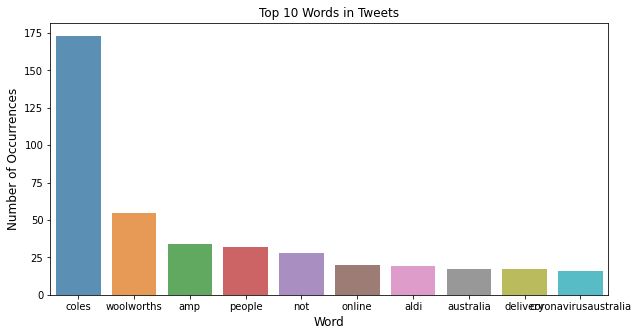

In [25]:
# Visualizing the top 10 word counts 

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Top 10 Words in Tweets')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [26]:
from PIL import Image
from wordcloud import WordCloud

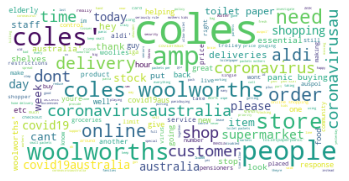

In [27]:
#Visualizing text corpus
corpus = list(df_Coles['tweet'])
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
# Creating a list of custom stopwords
new_words_to_remove = ["coles", "australia",]

In [29]:
# Removing common words using lambda function
df_Coles['tweet'] = df_Coles['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df_Coles.head(5)

,date,tweet,name,place,tweet_stem
157,2020-03-30,expensive lowincome people get groceries deliv...,Peasant _Australia,NaN,expens lowincom peopl get groceri deliv use ta...
158,2020-03-29,partners go tomorrow morning give drivers lice...,Peiter,NaN,partner go tomorrow morn give driver licens wo...
159,2020-03-29,hmmlocal loo paper hand towels increased selec...,BiBi,NaN,hmmlocal cole loo paper hand towel increas sel...
160,2020-03-28,post abuse shopping gone media click link read...,Dee Termhynd - Surviva,NaN,post abus shop gone media click link read cole...
161,2020-03-28,dj littleproudmp factcheck etc fresh food mark...,🐧📣 Lisa Brassington 💚,NaN,dj littleproudmp factcheck etc fresh food mark...


In [30]:
# Create a word frequency series. (pandas series)
word_frequency = pd.Series(' '.join(df_Coles['tweet']).split()).value_counts()

In [31]:
# Display top 10 words 
word_frequency[:10]

woolworths              55
amp                     34
people                  32
not                     28
online                  20
aldi                    19
delivery                17
need                    16
coronavirusaustralia    16
coronavirus             16
dtype: int64

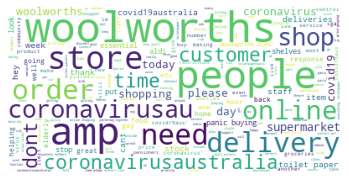

In [32]:
corpus = list(df_Coles['tweet'])
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**BIGRAMS**

---



In [33]:
#Extracting Bigrams from the tweet dataset
#This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):
    
    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0) 

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [34]:
bigrams_tweets = get_ngrams(df_Coles['tweet'].tolist(), ngram_range=(2, 2))

In [35]:
#Converting bigram to a dataframe with column names bi-gram and frequency.
bigrams_tweets_df = pd.DataFrame(bigrams_tweets)
bigrams_tweets_df.columns=["Bi-gram", "Freq"]

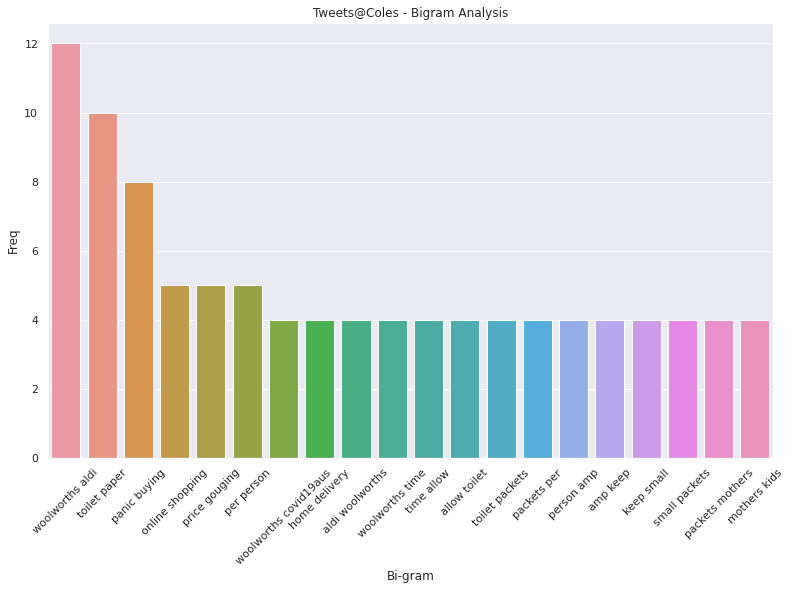

In [36]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_tweets_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=45)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Tweets@Coles - Bigram Analysis')
plt.show()

***TRIGRAMS***

---



In [37]:
# Trigrams
#Most frequently occuring Tri-grams
def get_trigrams(corpus):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

trigrams_tweets = get_ngrams(df_Coles['tweet'].tolist(), ngram_range=(3, 3))

In [38]:
#Converting tri-gram of dataset to a dataframe with column names tri-gram and frequency.
trigrams_tweets_df = pd.DataFrame(trigrams_tweets)
trigrams_tweets_df.columns=["Tri-gram", "Freq"]

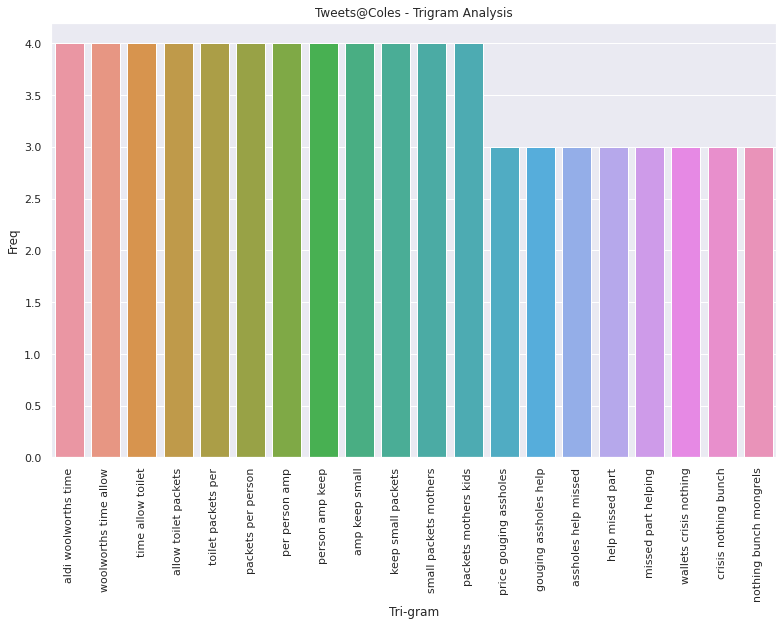

In [39]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_tweets_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Tweets@Coles - Trigram Analysis')
plt.show()

**TEMPORAL ANALYSIS** 

---



In [40]:
# Group the twitter dataset based on the date field and get the count per each day.
df_Coles_date_wise = df_Coles.groupby(['date'])['tweet'].count().reset_index(name='tweet_count_Coles').set_index('date')

#Display top n 
df_Coles_date_wise.head()

,tweet_count_Coles
date,
2020-03-02,1
2020-03-03,2
2020-03-04,1
2020-03-05,6
2020-03-06,1


<Figure size 720x288 with 0 Axes>

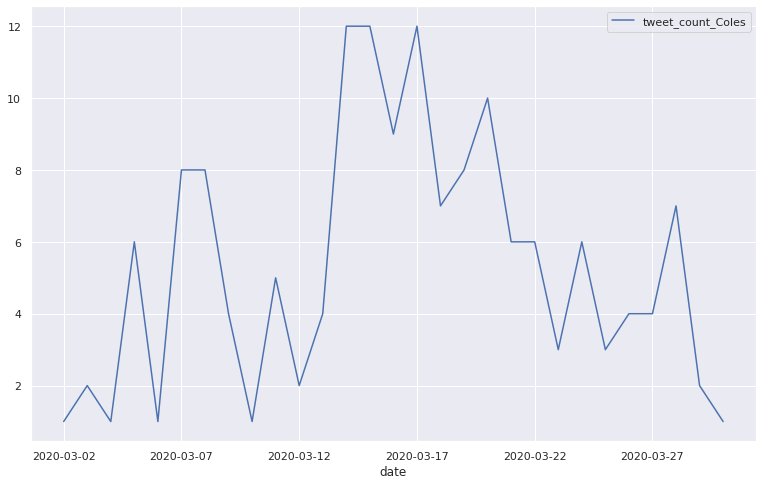

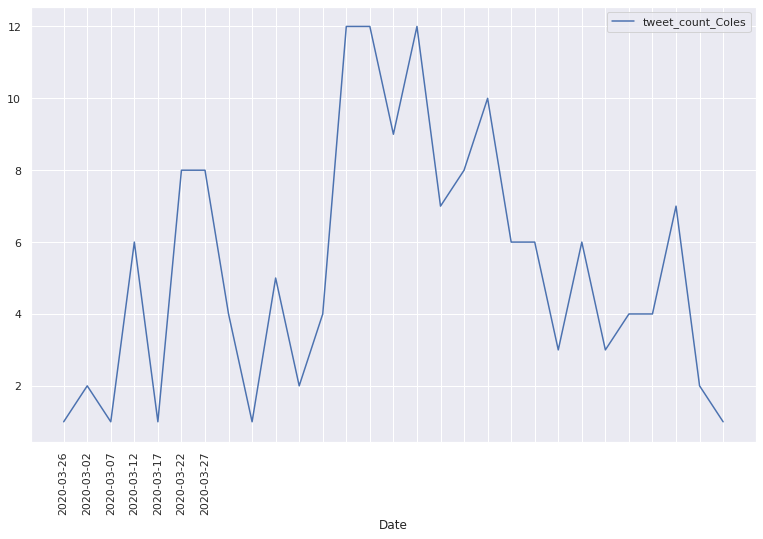

In [41]:
# Plot twitter activity timeline.
plt.figure(figsize=(10, 4))
ax = df_Coles_date_wise.plot()
df_Coles_date_wise.plot()
plt.xticks(np.arange(len(df_Coles_date_wise.index)), rotation=90)
plt.xlabel('Date')
plt.savefig('temporal_analysis.png', dpi=800)

**SENTIMENT ANALYSIS**

---



In [42]:
# Extract sentiments from the tweets
df_Coles['sentiment'] = df_Coles['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Display first 10 tweets with respective sentiment value
df_Coles[['tweet', 'sentiment']].head(10)

,tweet,sentiment
157,expensive lowincome people get groceries deliv...,-0.250000
158,partners go tomorrow morning give drivers lice...,0.100000
159,hmmlocal loo paper hand towels increased selec...,0.366667
160,post abuse shopping gone media click link read...,-0.071429
161,dj littleproudmp factcheck etc fresh food mark...,0.266071
162,cared much couldnt afford weeks ago price goug...,0.100000
163,rant fb parents shopping multiple kids tow vic...,-0.333333
164,hats workers working full efficiency keep stoc...,0.350000
165,dj long epstein hopefully amp investigate remo...,0.150000
166,really need cracking social distancing store b...,0.046667


In [43]:
df_senti_Coles_date_wise = df_Coles.groupby(['date'])['sentiment'].mean().reset_index(name='mean_sentiment-Coles').set_index('date')

Text(0.5, 0, 'Date')

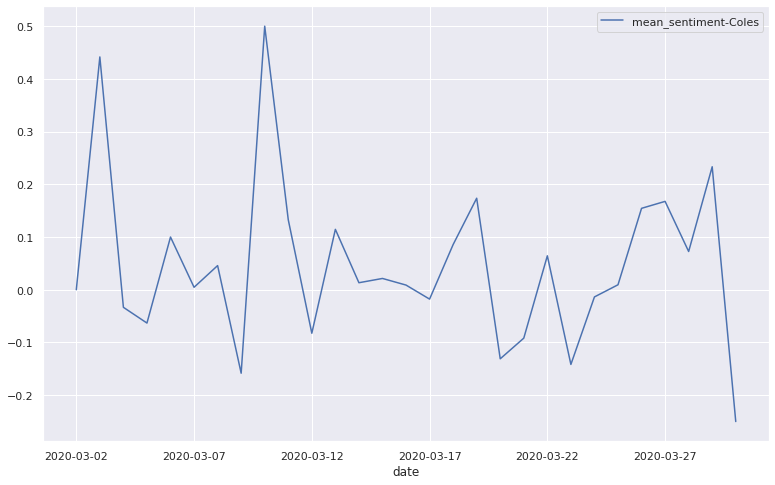

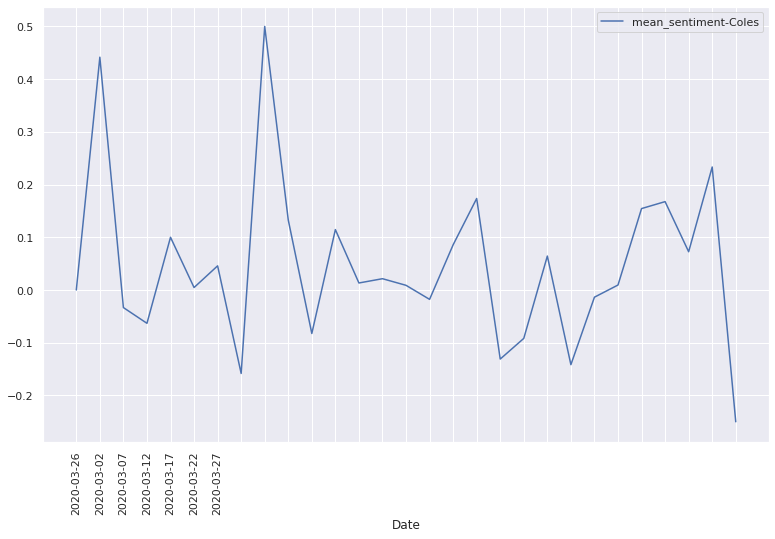

In [44]:
# Plot twitter sentimet timeline 
ax = df_senti_Coles_date_wise.plot()
df_senti_Coles_date_wise.plot()
plt.xticks(np.arange(len(df_senti_Coles_date_wise.index)), rotation=90)
plt.xlabel('Date')

**TOPIC MODELLING**

---



In [45]:
# Setting up the environment for LDA algorithm.
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [46]:
# Convert the lemmatized tweets as the text corpus.
corpus = list(df_Coles['tweet'])

In [47]:
# Tokanization
Coles_texts = [[word for word in str(document).split()] for document in corpus]

In [48]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(Coles_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'Coles.dict'))

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [49]:
# Print the dictionary
print(dictionary.token2id)

{'back': 0, 'car': 1, 'cheaper': 2, 'deliver': 3, 'delivered': 4, 'expensive': 5, 'get': 6, 'getting': 7, 'groceries': 8, 'lowincome': 9, 'people': 10, 'shops': 11, 'still': 12, 'taxi': 13, 'uber': 14, 'using': 15, 'woolworths': 16, 'addresses': 17, 'card': 18, 'drivers': 19, 'early': 20, 'give': 21, 'go': 22, 'id': 23, 'license': 24, 'match': 25, 'morning': 26, 'partners': 27, 'shifts': 28, 'tomorrow': 29, 'work': 30, 'calm': 31, 'could': 32, 'etc': 33, 'finding': 34, 'fresh': 35, 'hand': 36, 'hmmlocal': 37, 'increased': 38, 'loo': 39, 'meats': 40, 'ok': 41, 'online': 42, 'paper': 43, 'products': 44, 'saturday': 45, 'selection': 46, 'shoppers': 47, 'shopping': 48, 'towels': 49, 'use': 50, 'abuse': 51, 'children': 52, 'click': 53, 'gone': 54, 'hey': 55, 'link': 56, 'media': 57, 'parents': 58, 'post': 59, 'read': 60, 'shop': 61, 'single': 62, 'access': 63, 'aldi': 64, 'close': 65, 'dj': 66, 'essentialservices': 67, 'exact': 68, 'factcheck': 69, 'farmers': 70, 'food': 71, 'large': 72, 'l

In [50]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in Coles_texts]

In [51]:
# Corpus in machine readable format.
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(16, 1), (48, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(16, 1), (33, 1), (35, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)], [(10, 1), (16, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)], [(0, 1), (42, 1), (48, 1), (58, 1), (61, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1)

In [52]:
tweet_id = 0
print(Coles_texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(Coles_texts[tweet_id])) 
# each token is represented as a id from a dictionary

['expensive', 'lowincome', 'people', 'get', 'groceries', 'delivered', 'using', 'taxi', 'uber', 'get', 'shops', 'back', 'still', 'cheaper', 'getting', 'woolworths', 'deliver', 'car']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


**Generating the Topic Model**

In [53]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]
#Defining the number of topics we are about to capture through LDA
total_topics = 10


In [54]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 
# create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [55]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

[(0,
  '0.016*"woolworths" + 0.015*"need" + 0.011*"dont" + 0.009*"please" + 0.008*"like" + 0.007*"another"'),
 (1,
  '0.018*"woolworths" + 0.011*"etc" + 0.009*"like" + 0.008*"restrictions" + 0.008*"customers" + 0.007*"amp"'),
 (2,
  '0.019*"woolworths" + 0.015*"not" + 0.013*"1" + 0.010*"amp" + 0.009*"people" + 0.008*"seniors"'),
 (3,
  '0.013*"amp" + 0.011*"people" + 0.010*"delivery" + 0.010*"online" + 0.008*"woolworths" + 0.008*"get"'),
 (4,
  '0.016*"woolworths" + 0.009*"stores" + 0.009*"aldi" + 0.009*"2" + 0.008*"delivery" + 0.008*"need"'),
 (5,
  '0.020*"not" + 0.012*"water" + 0.012*"day" + 0.012*"toilet" + 0.009*"stop" + 0.009*"paper"'),
 (6,
  '0.015*"woolworths" + 0.012*"items" + 0.010*"paper" + 0.010*"covid19australia" + 0.008*"toilet" + 0.007*"coronavirusaustralia"'),
 (7,
  '0.010*"people" + 0.010*"dont" + 0.010*"price" + 0.009*"gouging" + 0.009*"part" + 0.009*"go"'),
 (8,
  '0.019*"woolworths" + 0.016*"people" + 0.013*"online" + 0.012*"not" + 0.011*"coronavirus" + 0.011*"sho

**Interactive Topic Analyzer**

In [56]:
!python -m pip install -U pyLDAvis

Requirement already up-to-date: pyLDAvis in /usr/local/lib/python3.7/dist-packages (3.3.1)


In [57]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  53.896728
3       0.648955  71.707100       2        1   5.817104
7      71.019684   9.971006       3        1   5.285056
0       3.785981  33.185135       4        1   5.000504
5     -42.666500  -9.222070       5        1   5.000189
6      -3.621689 -43.526516       6        1   5.000155
9      -3.632402  -4.171708       7        1   5.000143
2     -36.584400  35.804413       8        1   5.000119
1      44.391380  50.615383       9        1   5.000002
4      40.235809 -31.591665      10        1   5.000001, topic_info=           Term      Freq     Total Category  logprob  loglift
16   woolworths  2.000000  2.000000  Default  30.0000  30.0000
119         amp  1.000000  1.000000  Default  29.0000  29.0000
217         not  1.000000  1.000000  Default  28.0000  28.0000
280    delivery  1.000000  1.000000  Default  27.0000  27.0000
10       people  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
591       panic  0.034269  0.548648  Topic10  -5.4212   0.2225
688      buying  0.031363  0.550494  Topic10  -5.5098   0.1306
234       every  0.025546  0.112911  Topic10  -5.7150   1.5096
193     another  0.025951  0.159029  Topic10  -5.6992   1.1829
232         day  0.025691  0.393407  Topic10  -5.7093   0.2670

[618 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
119       1  0.698062          amp
0         1  1.546818         back
211       1  0.847652  coronavirus
254       1  1.049440      covid19
87        1  1.391811   covid19aus
280       1  0.948078     delivery
737       1  1.324611      elderly
561       1  1.590548         guys
217       1  0.674750          not
42        1  0.718393       online
10        1  0.547075       people
48        1  0.862466     shopping
221       1  1.201813       stores
578       1  1.724534        virus
16        1  0.804703   woolworths, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 8, 1, 6, 7, 10, 3, 2, 5])